# Introduction to scikit-learn

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover


0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

## 0. An end-to-end Scikit-Learn workflow

In [ ]:
# 1. Get the data ready
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
# Create X (feautres matrix)
X =  heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [ ]:
# 2. Choose the right model and hyperparameters
# This is a classification problem because we want to determine if X = heart disease

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 90)

# We'll keep the default hyperparameters
clf.get_params()

In [ ]:
# Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf.fit(X_train, y_train);
X_train.head()

In [ ]:
# Make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test.head()

In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(10)
for i in range(10, 100, 10):
    print("Trying model with {} estimators".format(i))
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print("Model accuracy on test set: {} %".format(clf.score(X_test, y_test)))
    print()

In [ ]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random-forest-model1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("Random-forest-model1.pkl", "rb"))
loaded_model.score(X_test, y_test)

# Retry again

In [ ]:
heart_data = pd.read_csv("heart-disease.csv")
heart_data.head()

In [ ]:
X = heart_data.drop("target", axis=1)
X

In [ ]:
y = heart_data["target"]
y

In [ ]:
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf.fit(X_train, y_train);

In [ ]:
y_pred = clf.predict(X_test)
y_pred

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

# Retry again

In [ ]:
heart_data = pd.read_csv("heart-disease.csv")
X = heart_data.drop("target", axis=1)
y = heart_data["target"]

clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

In [ ]:
what_were_covering

# 1. Getting your data ready

Three main things we have to do:
    1. Split the data into features and labels (Usually "X" and "y")
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target", axis=1)
X.head()

In [ ]:
y = heart_disease["target"]
y.head()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # Important, make sure shapes match.

# 1.1 Make sure its all numerical

In [ ]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split the data into x and y
X = car_sales.drop("Price", axis=1)
X.head()

In [ ]:
y = car_sales["Price"]
y.head()

In [ ]:
# SPlit into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train) # FIt on training data
model.score(X_test, y_test) # Evaluate on test data

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

In [ ]:
X.head()

In [ ]:
pd.DataFrame(transformed_x).head()

In [ ]:
# dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
# dummies.head()

In [ ]:
# Lets try refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model.fit(X_train, y_train);

In [ ]:
model.score(X_test, y_test)

# 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import car sales missing data
missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
missing_data.head()
missing_data.dtypes

In [ ]:
missing_data.isna().sum()

In [ ]:
# Create X and y
X = missing_data.drop("Price", axis=1)
X.head()

In [ ]:
y = missing_data["Price"]
y.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(X)

In [ ]:
X.isna().sum()

#### Option 1: Fill missing  data with pandas

In [ ]:
# Fill the "Make" column
missing_data["Make"].fillna("missing", inplace=True)

# Fill the "Color" column
missing_data["Colour"].fillna("missing", inplace=True)

# Fill missing "Odometer (KM)" with mean of Odometer
missing_data["Odometer (KM)"].fillna(missing_data["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column with the average of doors
missing_data["Doors"].value_counts()
missing_data["Doors"].fillna(4, inplace=True)

# CHeck our dataframe again
missing_data.isna().sum()

In [ ]:
# Remove rows with missing price value
missing_data.dropna(inplace=True)
missing_data.isna().sum()

In [ ]:
len(missing_data)

In [ ]:
X = missing_data.drop("Price", axis=1)
y = missing_data["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [ ]:
heart_disease.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
clf.fit(X_train, y_train);

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

# Try again making data numerical and running ML

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Get the data ready
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head(), len(car_sales), car_sales.dtypes

In [ ]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [ ]:
feature_data = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 feature_data)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
X_pd = pd.DataFrame(data=transformed_X)
X_pd.head()
# model = RandomForestRegressor()
# transformed_X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pd, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

# Restart

In [ ]:
what_were_covering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Getting the data ready
missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
missing_data.head(), len(missing_data), missing_data.dtypes

In [ ]:
missing_data.isna().sum()

In [ ]:
# FIll missing data in "Make", "Color", "Odometer", "Doors" with "missing" and drop missing data in price
# Make string data numerical

missing_data["Make"].fillna("missing", inplace=True)
missing_data["Colour"].fillna("missing", inplace=True)
missing_data["Odometer (KM)"].fillna(missing_data["Odometer (KM)"].mean(), inplace=True)
missing_data["Doors"].fillna(4, inplace=True)

missing_data.dropna(inplace=True)

In [ ]:
missing_data.isna().sum()

In [ ]:
# Now that all missing data has been sorted. Sort the data into X and y
X = missing_data.drop("Price", axis=1)
y = missing_data["Price"]

In [ ]:
X.head(), y.head()

In [ ]:
# Turn the data into numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

feature_data = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 feature_data)],
                               remainder="passthrough",
                               sparse_threshold=0)

transformed_X = transformer.fit_transform(X)
X_pd = pd.DataFrame(transformed_X)
X_pd.head()

In [ ]:
# Fit the model. We are trying to get an estimate of price
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=60)
X_train, X_test, y_train, y_test = train_test_split(X_pd, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Train the data
model.fit(X_train, y_train);

In [ ]:
# Test the trained data
model.score(X_train, y_train)

In [ ]:
# Test the test data
model.score(X_test, y_test)

In [ ]:
for i in range(10, 100, 25):
    model = RandomForestRegressor(n_estimators=i)
    X_train, X_test, y_train, y_test = train_test_split(X_pd, y, test_size=0.2)
    model.fit(X_train, y_train);
    model.score(X_train, y_train)
    print("Testing {} estimators: Result = {}".format(i, model.score(X_test, y_test)))

# Option 2. FIll missing values with scikit-learn

In [ ]:
missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
missing_data.isna().sum()

In [ ]:
missing_data

In [ ]:
# Drop the rows with no labeks
missing_data.dropna(subset=["Price"], inplace=True)
missing_data.isna().sum()

In [ ]:
missing_data

In [ ]:
X = missing_data.drop("Price", axis=1)
y = missing_data["Price"]

In [ ]:
missing_data

In [ ]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feature),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
X_pd = pd.DataFrame(filled_X,
                    columns=["Make", "Colour", "Doors", "Odometer (KM)"])
X_pd.head()

In [ ]:
X_pd.isna().sum()

In [ ]:
# Convert catagorical value to numerical
from sklearn.preprocessing import OneHotEncoder


cat_data = ["Make", "Colour", "Doors"]
hot_one = OneHotEncoder()
transformer = ColumnTransformer([("hot_one", hot_one, cat_data)],
                                remainder="passthrough",
                               sparse_threshold=0)

transform_X = transformer.fit_transform(X_pd)
transform_X

In [ ]:
# Now that our data is numbers and filled (No missing values). Fit a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Retry

In [ ]:
what_were_covering

In [ ]:
# Getting the data ready
# Import the data
# Check for missing data
# Make categorical data numerical
# Choose the right model
# fit the model
# Make predictions

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# 1. import the data
missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
missing_data.head()

In [ ]:
# 2. check for missing data
missing_data.isna().sum()

In [ ]:
# Drop data with no labels
missing_data.dropna(subset=["Price"], inplace=True)
missing_data.isna().sum()

In [ ]:
# Split the data
X = missing_data.drop("Price", axis=1)
y = missing_data["Price"]

In [ ]:
X.isna().sum()

In [ ]:
# Fix the missing data in X
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
mean_imputer = SimpleImputer(strategy="mean")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

cat_feature = ["Make", "Colour"]
mean_feature = ["Odometer (KM)"]
door_feature = ["Doors"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feature),
    ("mean_imputer", mean_imputer,mean_feature),
    ("door_imputer", door_imputer, door_feature)])

filled_X = imputer.fit_transform(X)
filled_X[:5]

In [ ]:
# Put data back into a dataframe
X_pd = pd.DataFrame(filled_X, columns=["Make", "Colour", "Odometer (KM)", "Doors"])

In [ ]:
X_pd.head()

In [ ]:
# Change categorical data into numerical data

categorical_data = ["Make", "Colour", "Odometer (KM)", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_data)], remainder="passthrough", sparse_threshold=0)

transformed_X = transformer.fit_transform(X_pd)

In [ ]:
# Sort data into training and test data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

# Fixing missing values with scikit-learn the recommended way
* Fill the missing data with the transformer on X_train and X_test for better results

In [ ]:
what_were_covering

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
# 1. Get the data ready
missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
missing_data.head()

In [ ]:
missing_data.isna().sum()

In [ ]:
# Drop data with no labels
missing_data.dropna(subset=["Price"], inplace=True)
missing_data.isna().sum()

In [ ]:
# Split the data
X = missing_data.drop("Price", axis=1)
y = missing_data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Fill in the missing values
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
num_imputer = SimpleImputer(strategy="mean")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

cat_feat = ["Make", "Colour"]
num_feat = ["Odometer (KM)"]
door_feat = ["Doors"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feat),
    ("num_imputer", num_imputer, num_feat),
    ("door_imputer", door_imputer, door_feat)
], remainder="passthrough", sparse_threshold=0)

transformed_X_train = imputer.fit_transform(X_train)
transformed_X_test = imputer.fit_transform(X_test)

In [ ]:
# Put transformed data into a dataframe
X_train_pd = pd.DataFrame(transformed_X_train, columns=["Make", "Colour", "Odometer (KM)", "Doors"])
X_test_pd = pd.DataFrame(transformed_X_test, columns=["Make", "Colour", "Odometer (KM)", "Doors"])

In [ ]:
# No missing data
X_train_pd.isna().sum(), X_test_pd.isna().sum()

In [ ]:
len(X_test_pd), len(y_test)

In [ ]:
# Change X_train_pd and X_test_pd into numerical data
one_hot = OneHotEncoder()
cat_features = ["Make", "Colour", "Doors"]

transformer = ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough", sparse_threshold=0)

transformed_X_train = transformer.fit_transform(X_train_pd)
transformed_X_test = transformer.fit_transform(X_test_pd)

In [ ]:
model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)

In [ ]:

model.score(transformed_X_test, y_test)

In [ ]:
what_were_covering

# 2. Choose the right estimator/algorithm for out problems
Scikit-Learn uses estimator for another term for machine learning or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

## 2.1 picking a machine learning model for a regression problem

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston = pd.read_csv("HousingData.csv")
boston["target"] = target

In [ ]:
boston.isna().sum()

In [ ]:
# How many samples
len(boston)

In [ ]:
boston.dropna(inplace=True)

In [ ]:
boston.isna().sum()

In [2]:
# Lets try the ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston.drop("target", axis=1)
y = boston["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the train data
model.score(X_train, y_train)

NameError: name 'boston' is not defined

In [ ]:
# Check the score of the ridge model on test data
model.score(X_test, y_test)

In [3]:
# Test cali housing
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
cali_data = fetch_california_housing()

cali_df = pd.DataFrame(cali_data["data"], columns=cali_data["feature_names"])
cali_df["target"] = pd.Series(cali_data["target"])

In [4]:
# Sort out the data
X = cali_df.drop("target", axis=1)
y = cali_df["target"]

# Split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model = Ridge()

# Check the score
model.fit(X_train, y_train)

# Check train score
model.score(X_train, y_train)

0.6097712980505098

In [5]:
# Check test score
model.score(X_test, y_test)

0.5913788537398925

How do we improve this score?

What if ridge isnt working

Lets refer back tot the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [6]:
# Try it with the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.803771542847289

In [17]:
# The RandomForest did a better job
# Use the machine learning map

# 2.2 Choosing an estimator for a classification problem
 * Refer to the map

In [6]:
# Choose an estimator for the heart disease csv
# Get the data ready

heart_disease = pd.read_csv("heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Choose the correct estimator
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train);

In [7]:
clf.score(X_test, y_test)

0.6885245901639344

In [8]:
# Lets compare to RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
round(model.score(X_test, y_test), 2)

0.79

* You chose the model wrong. You had less than 100K samples
* Use LinearSVC


In [9]:
import warnings 
warnings.filterwarnings("ignore")

In [10]:
from sklearn.svm import LinearSVC

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
round(clf.score(X_test, y_test), 2)

0.87

Tidbit:

    1. If you have structured data, use ensamble methods
    2. If you have unstructured data, use deeplearning or transfer learning

In [11]:
what_were_covering

NameError: name 'what_were_covering' is not defined

# 3. Fit the model and our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for:
* "X" = features, feature variables, data
* "y" = labels, targets, target variables

In [13]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
heart_disease = pd.read_csv("heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the model to the data (Training machine learning model)
model.fit(X_train, y_train)

# Evaluate the model (Use the patterns the model has learnt)
model.score(X_test, y_test)

0.8524590163934426

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning 

2 ways to make predictions:

    * 1. predict()
    * 2. predict_proba()

In [15]:
# Use a trained model to make predictions
model.predict(np.array([1, 7, 8, 3, 4])) # This doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
X_test.shape

(61, 13)

In [17]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [19]:
# Conpare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [20]:
model.score(X_test, y_test)

0.8524590163934426

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [23]:
print(X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
249   69    1   2       140   254    0        0      146      0      2.0   
104   50    1   2       129   196    0        1      163      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
193   60    1   0       145   282    0        0      142      1      2.8   
184   50    1   0       150   243    0        0      128      0      2.6   

     slope  ca  thal  
179      1   1     1  
228      1   0     3  
111      2   1    

In [24]:
print(y_test)

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64


Make predictions withh "predict_proba()"

In [26]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [27]:
# Lets predict() on the same data
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [28]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [59]:
# Predict target with cali housing model using regression
# Setup your data
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()

cali_df = pd.DataFrame(cali["data"], columns=cali["feature_names"])
cali_df["target"] = pd.Series(cali["target"])

X = cali_df.drop("target", axis=1)
y = cali_df["target"]

In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the regression model with RandomForestRegressor
model = RandomForestRegressor().fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.8082849194024588

In [61]:
# Predict model
y_pred = model.predict(X_test)

In [62]:
y_pred[:10]

array([3.26123  , 1.42044  , 3.2745204, 1.81706  , 0.95867  , 2.2390801,
       4.1035521, 1.3133   , 0.8679001, 1.90411  ])

In [63]:
np.array([y_test])

array([[3.297, 1.343, 3.125, ..., 2.143, 1.651, 0.615]])

In [64]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.32885292671996147

In [65]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# The lower the number, the better the prediction
* Because cali_df == 4.526, mean_absolute_error is 0.32. 
* Meaning its 0.32 off on the predictions

In [67]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

# 4. Evaluating a model

Three ways to evaluate Scikit-Learn models/estimators
1. Estimatore "score" method
2. The "scoring" parameter
3. Problem-specific metric function

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np 

In [3]:
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier().fit(X_train, y_train)

In [4]:
### 4.1 Evaluating a model with the score method
model.score(X_test, y_test)

0.8524590163934426

Lets do the same but for regression

In [5]:
np.random.seed(42)
cali = fetch_california_housing()
cali_df = pd.DataFrame(cali["data"], columns=cali["feature_names"])
cali_df["target"] = pd.Series(cali["target"])

X = cali_df.drop("target", axis=1)
y = cali_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [6]:
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model with the "scoring" parameter

In [7]:
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier().fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

In [8]:
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [9]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Take mean on 5 fold cross validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y))

# Compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [10]:
# Defaul scoring parameter of classifier = mean accuracy

In [11]:
# The scoring parameter is set to none by default
cross_val_score(model, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Are under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
model = RandomForestClassifier()
cvs = cross_val_score(model, X, y)

In [14]:
print(f"Heart disease classifier cross-validated: {np.mean(cvs) * 100:.2f}%")

Heart disease classifier cross-validated: 81.17%


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a models true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1 

In [33]:
# Create X and y test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train);

In [16]:
from sklearn.metrics import roc_curve

# Make predictions with probablilites
y_probs = model.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.04, 0.96],
        [0.65, 0.35],
        [0.17, 0.83],
        [0.99, 0.01],
        [0.19, 0.81],
        [0.16, 0.84],
        [0.51, 0.49],
        [0.92, 0.08],
        [0.44, 0.56],
        [0.25, 0.75]]),
 61)

In [17]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.96, 0.35, 0.83, 0.01, 0.81, 0.84, 0.49, 0.08, 0.56, 0.75])

In [18]:
# Calculate fpr and tpr thressholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [19]:
# Check the false postive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08695652,
       0.08695652, 0.13043478, 0.13043478, 0.17391304, 0.17391304,
       0.2173913 , 0.2173913 , 0.30434783, 0.34782609, 0.43478261,
       0.43478261, 0.47826087, 0.47826087, 0.56521739, 0.56521739,
       0.56521739, 0.60869565, 0.60869565, 0.7826087 , 1.        ])

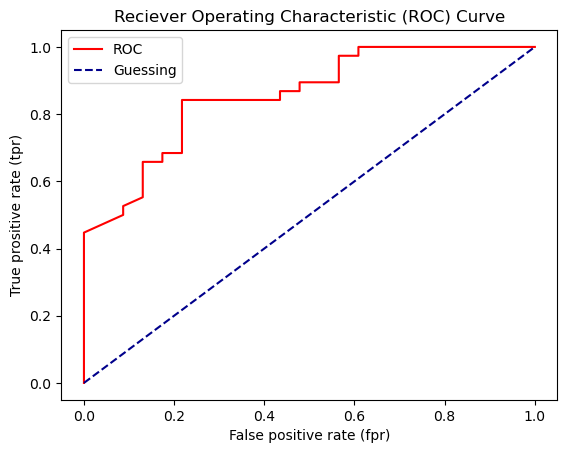

In [20]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve using false postitive rate (fpr)
    and true positive rate (tps) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="red", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True prositive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr);

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8552631578947368

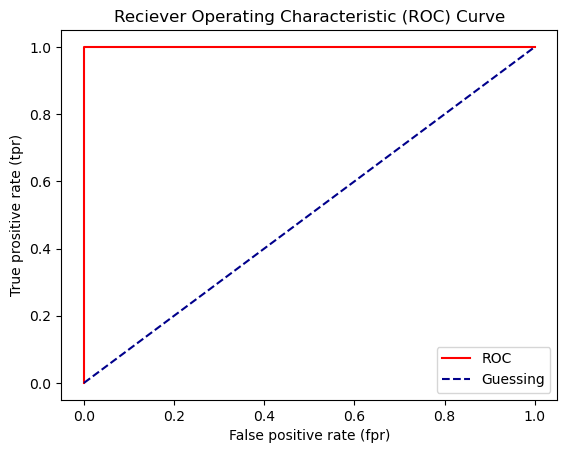

In [22]:
# Plot perfect ROC curve and AUCC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [23]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused. 

In [24]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[18,  5],
       [ 7, 31]], dtype=int64)

In [25]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual labels"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,18,5
1,7,31


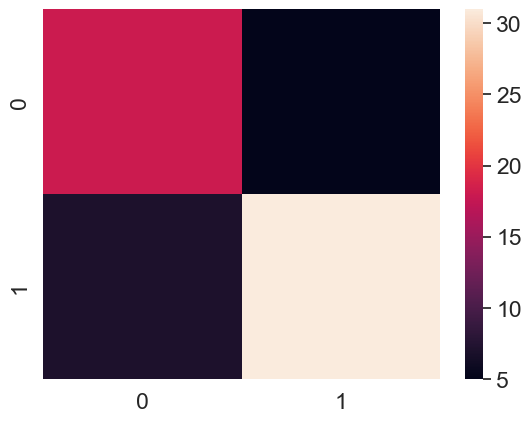

In [26]:
# Make our confusion matrix more visual with seaborns heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_map = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_map);

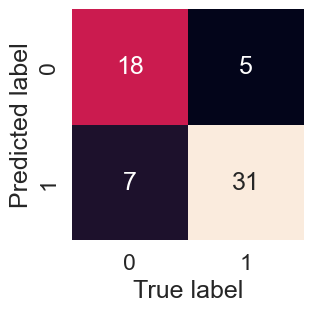

In [27]:
import matplotlib.pyplot as plt
def plot_conf_map(conf_map):
    """
    Plot a confusion matrix using seaborns headmap()
    """
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_map, annot=True, cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_map(conf_map)

**Classification report**

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61



In [29]:
# Where precission and recall become valueble

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one sensitive case

disease_preds = np.zeros(10000) # Model predicts every case as zero
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\mahou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

**Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

**Precision** and **recall** become more important when classes are imbalanced.
If false positive predictions are worse than false negatives, aim for higher precision.
If false negative predictions are worse than false positives, aim for higher recall.

**F1-score** is a combination of precision and recall.

## 4.2.2 Regression model evaluation metrics

Link to documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squarred) or coeffecient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

Compares your models predictions to the mean of the target. 
Values can range from from negative infinity (A very poor model) to 1. 
For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0.
If your model predicts a range of numbers, it's R^2 value would be 1. 

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd

cali = fetch_california_housing()
cali_df = pd.DataFrame(cali["data"], columns=cali["feature_names"])
cali_df["target"] = pd.Series(cali["target"])

np.random.seed(42)
X = cali_df.drop("target", axis=1)
y = cali_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train)

In [2]:
model.score(X_test, y_test)

0.8065734772187598

In [3]:
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [4]:
y_test.mean()

2.0550030959302323

In [5]:
r2_score(y_test, y_test_mean)

0.0

In [6]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MSE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [7]:
# Mean aboslute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [8]:
df = pd.DataFrame(data={"Actual values": y_test, "Predicted values": y_preds})
df["Difference"] = df["Actual values"] - df["Predicted values"]
df.head()

,Actual values,Predicted values,Difference
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,-0.357160
9814,2.78000,2.331760,0.448240


**Mean squared error (MSE)**

In [9]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [10]:
# Calculate mse by hand
squared = np.square(df["Difference"])

In [11]:
squared

20046    0.000284
3024     0.088173
15663    0.005100
20484    0.127563
9814     0.200919
           ...   
15362    0.170255
16623    0.518746
18086    0.026775
2144     0.000027
3665     0.026899
Name: Difference, Length: 4128, dtype: float64

In [12]:
squared.mean()

0.2534678520824551

### 4.2.3 Finally using the scoring parameter

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import pandas as pd

heart_disease = pd.read_csv("heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

In [19]:
cv_acc = cross_val_score(model, X,y, scoring=None)
cv_acc

array([0.78688525, 0.8852459 , 0.80327869, 0.81666667, 0.76666667])

In [20]:
# Cross validated accuracy
print(f"The cross validated accuracy is {np.mean(cv_acc) * 100:.2f}%")

The cross validated accuracy is 81.17%


In [30]:
# Accuracy
cv_acc = cross_val_score(model, X,y, scoring="accuracy")
print(f"The cross validated accuracy is {np.mean(cv_acc) * 100:.2f}%")

The cross validated accuracy is 82.15%


In [31]:
# Precision
cv_precision = cross_val_score(model, X, y, scoring='precision')
print(f"The cross validated accuracy is {np.mean(cv_precision) * 100:.2f}%")

The cross validated accuracy is 81.99%


In [32]:
# Recall
cv_recall = cross_val_score(model, X, y, scoring="recall")
print(f"The cross validated accuracy is {np.mean(cv_recall) * 100:.2f}%")

The cross validated accuracy is 86.06%


In [33]:
# F1
cv_f1 = cross_val_score(model, X, y, scoring="f1")
np.mean(cv_f1)

0.8430275909026674

How about our regression model

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

np.random.seed(42)
cali = fetch_california_housing()
cali_df = pd.DataFrame(cali["data"], columns=cali["feature_names"])
cali_df["target"] = pd.Series(cali["target"])

X = cali_df.drop("target", axis=1)
y = cali_df["target"]



model = RandomForestRegressor()

In [43]:
# Defaukt scoring method is R2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [44]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-0.53895506, -0.4118183 , -0.43888317, -0.464205  , -0.47454934])

In [45]:
# Meam squared error
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.42935863518011796

###  4.3 Using different evaluation metrics as Scikit-learn functions

**Classification evaluation functions**

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

np.random.seed(42)

heart_disease = pd.read_csv("heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evauluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1 {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy score: 85.25%
Precision: 84.85%
Recall: 0.875
F1 0.8615384615384615


**Regression evaluation functions**

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

cali = fetch_california_housing()
cali_df = pd.DataFrame(cali["data"], columns=cali["feature_names"])
cali_df["target"] = pd.Series(cali["target"])

X = cali_df.drop("target", axis=1)
y = cali_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the regressor model
print("Regression metrics on test set")
print(f"R2: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set
R2: 81.40%
MAE: 0.3252276998546514
MSE: 0.25064558026555245
